# Chroma and Luma

In this notebook we look at the relationship between Luma and Chroma.

In [1]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import load_paths
from src.data import make_kodim

import matplotlib.pyplot as plt
import numpy as np

[kodims, kodim_files] = make_kodim.load_kodim()

## Parameters for the experience

In [2]:
# Block size used to compare luma and chroma 
block_size = 32

# Image used
im = kodims[4]

## Y vs. U

For each block in the image, we plot the Y values along the X axis and the U values along the Y axis.

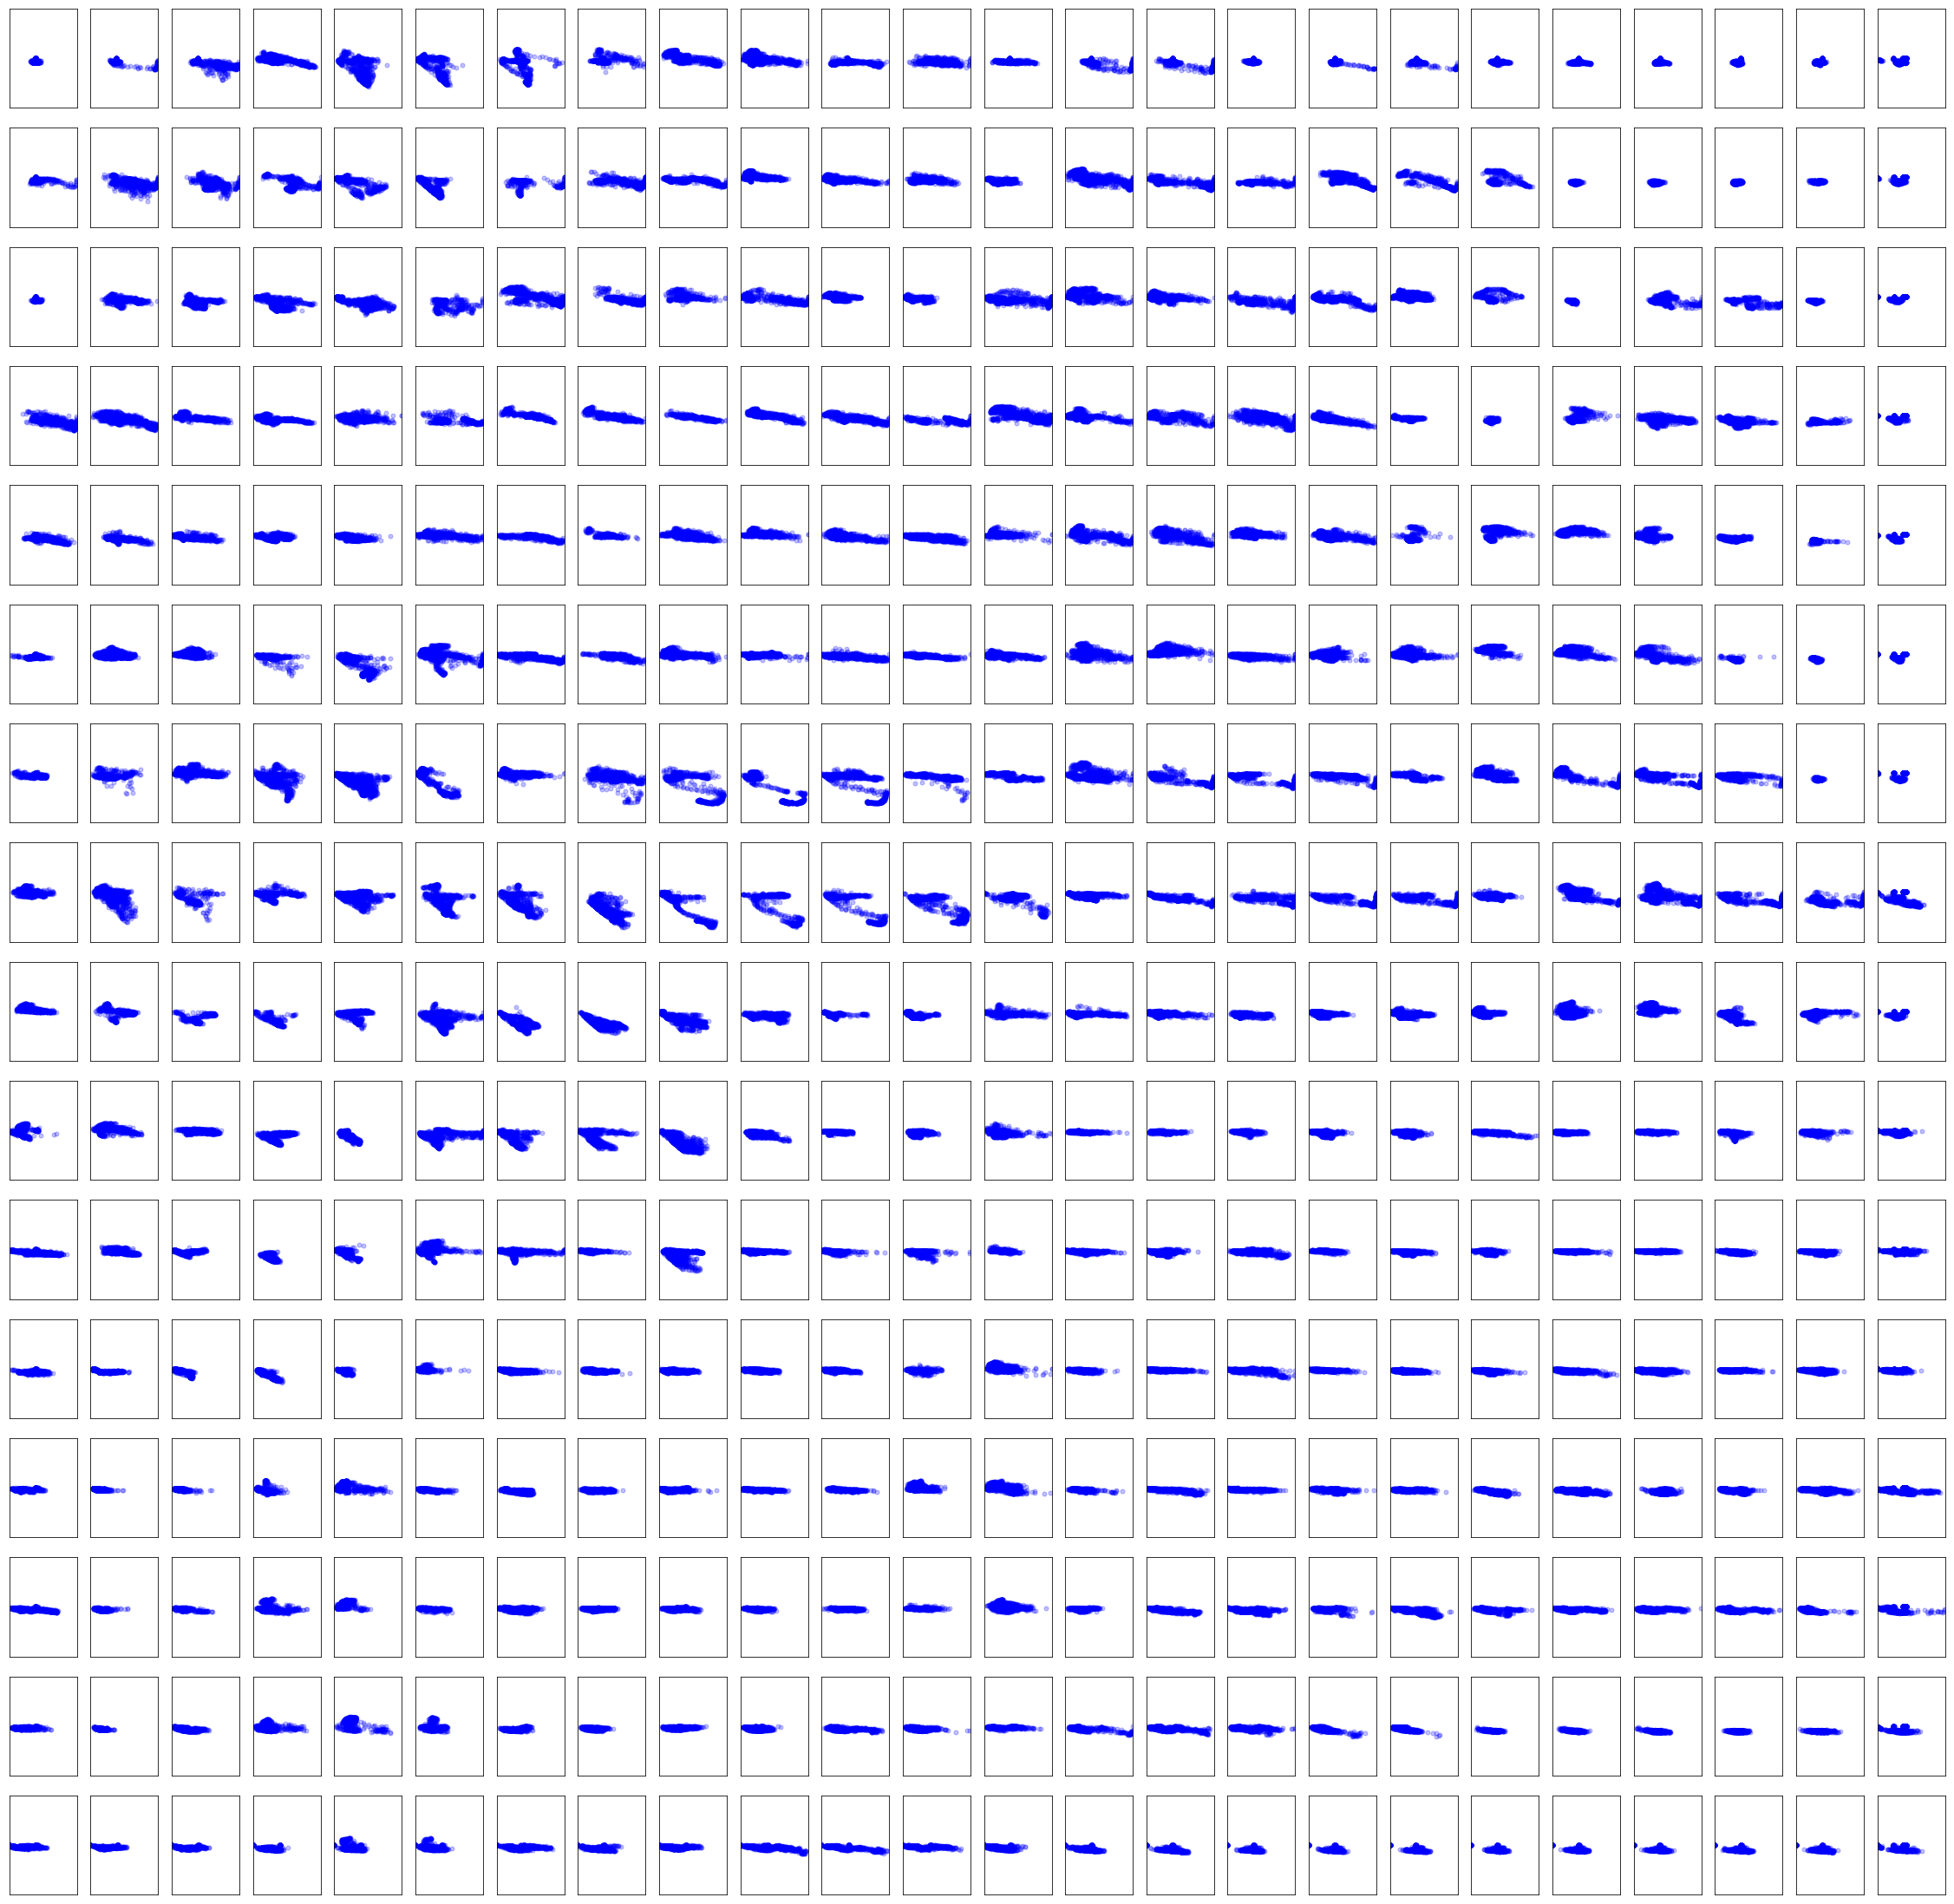

In [3]:
height, width, z = im.shape
plot_width = int(width / block_size)
plot_height = int(height / block_size)

corrU = np.zeros((plot_height, plot_width))

plt.figure(figsize=(40,40))
yy = 0
zz = 1
for y in range(0, height, block_size):
    xx = 0
    for x in range(0, width, block_size):
        bY = im[y:y+block_size, x:x+block_size,0].ravel()
        bU = im[y:y+block_size, x:x+block_size,1].ravel()
        
        corr = np.corrcoef(bY, bU)
        corrU[yy,xx] = abs(corr[0,1])
        
        plt.subplot(plot_height,plot_width, zz)
        plt.scatter(bY, bU, c="blue", alpha=0.25, s=25)
        plt.gca().set_ylim([0, 255])
        plt.gca().set_xlim([0, 255])
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
        xx = xx + 1
        zz = zz + 1
    yy = yy + 1

## Y vs V

For each block in the image, we plot the Y values along the X axis and the V values along the Y axis.

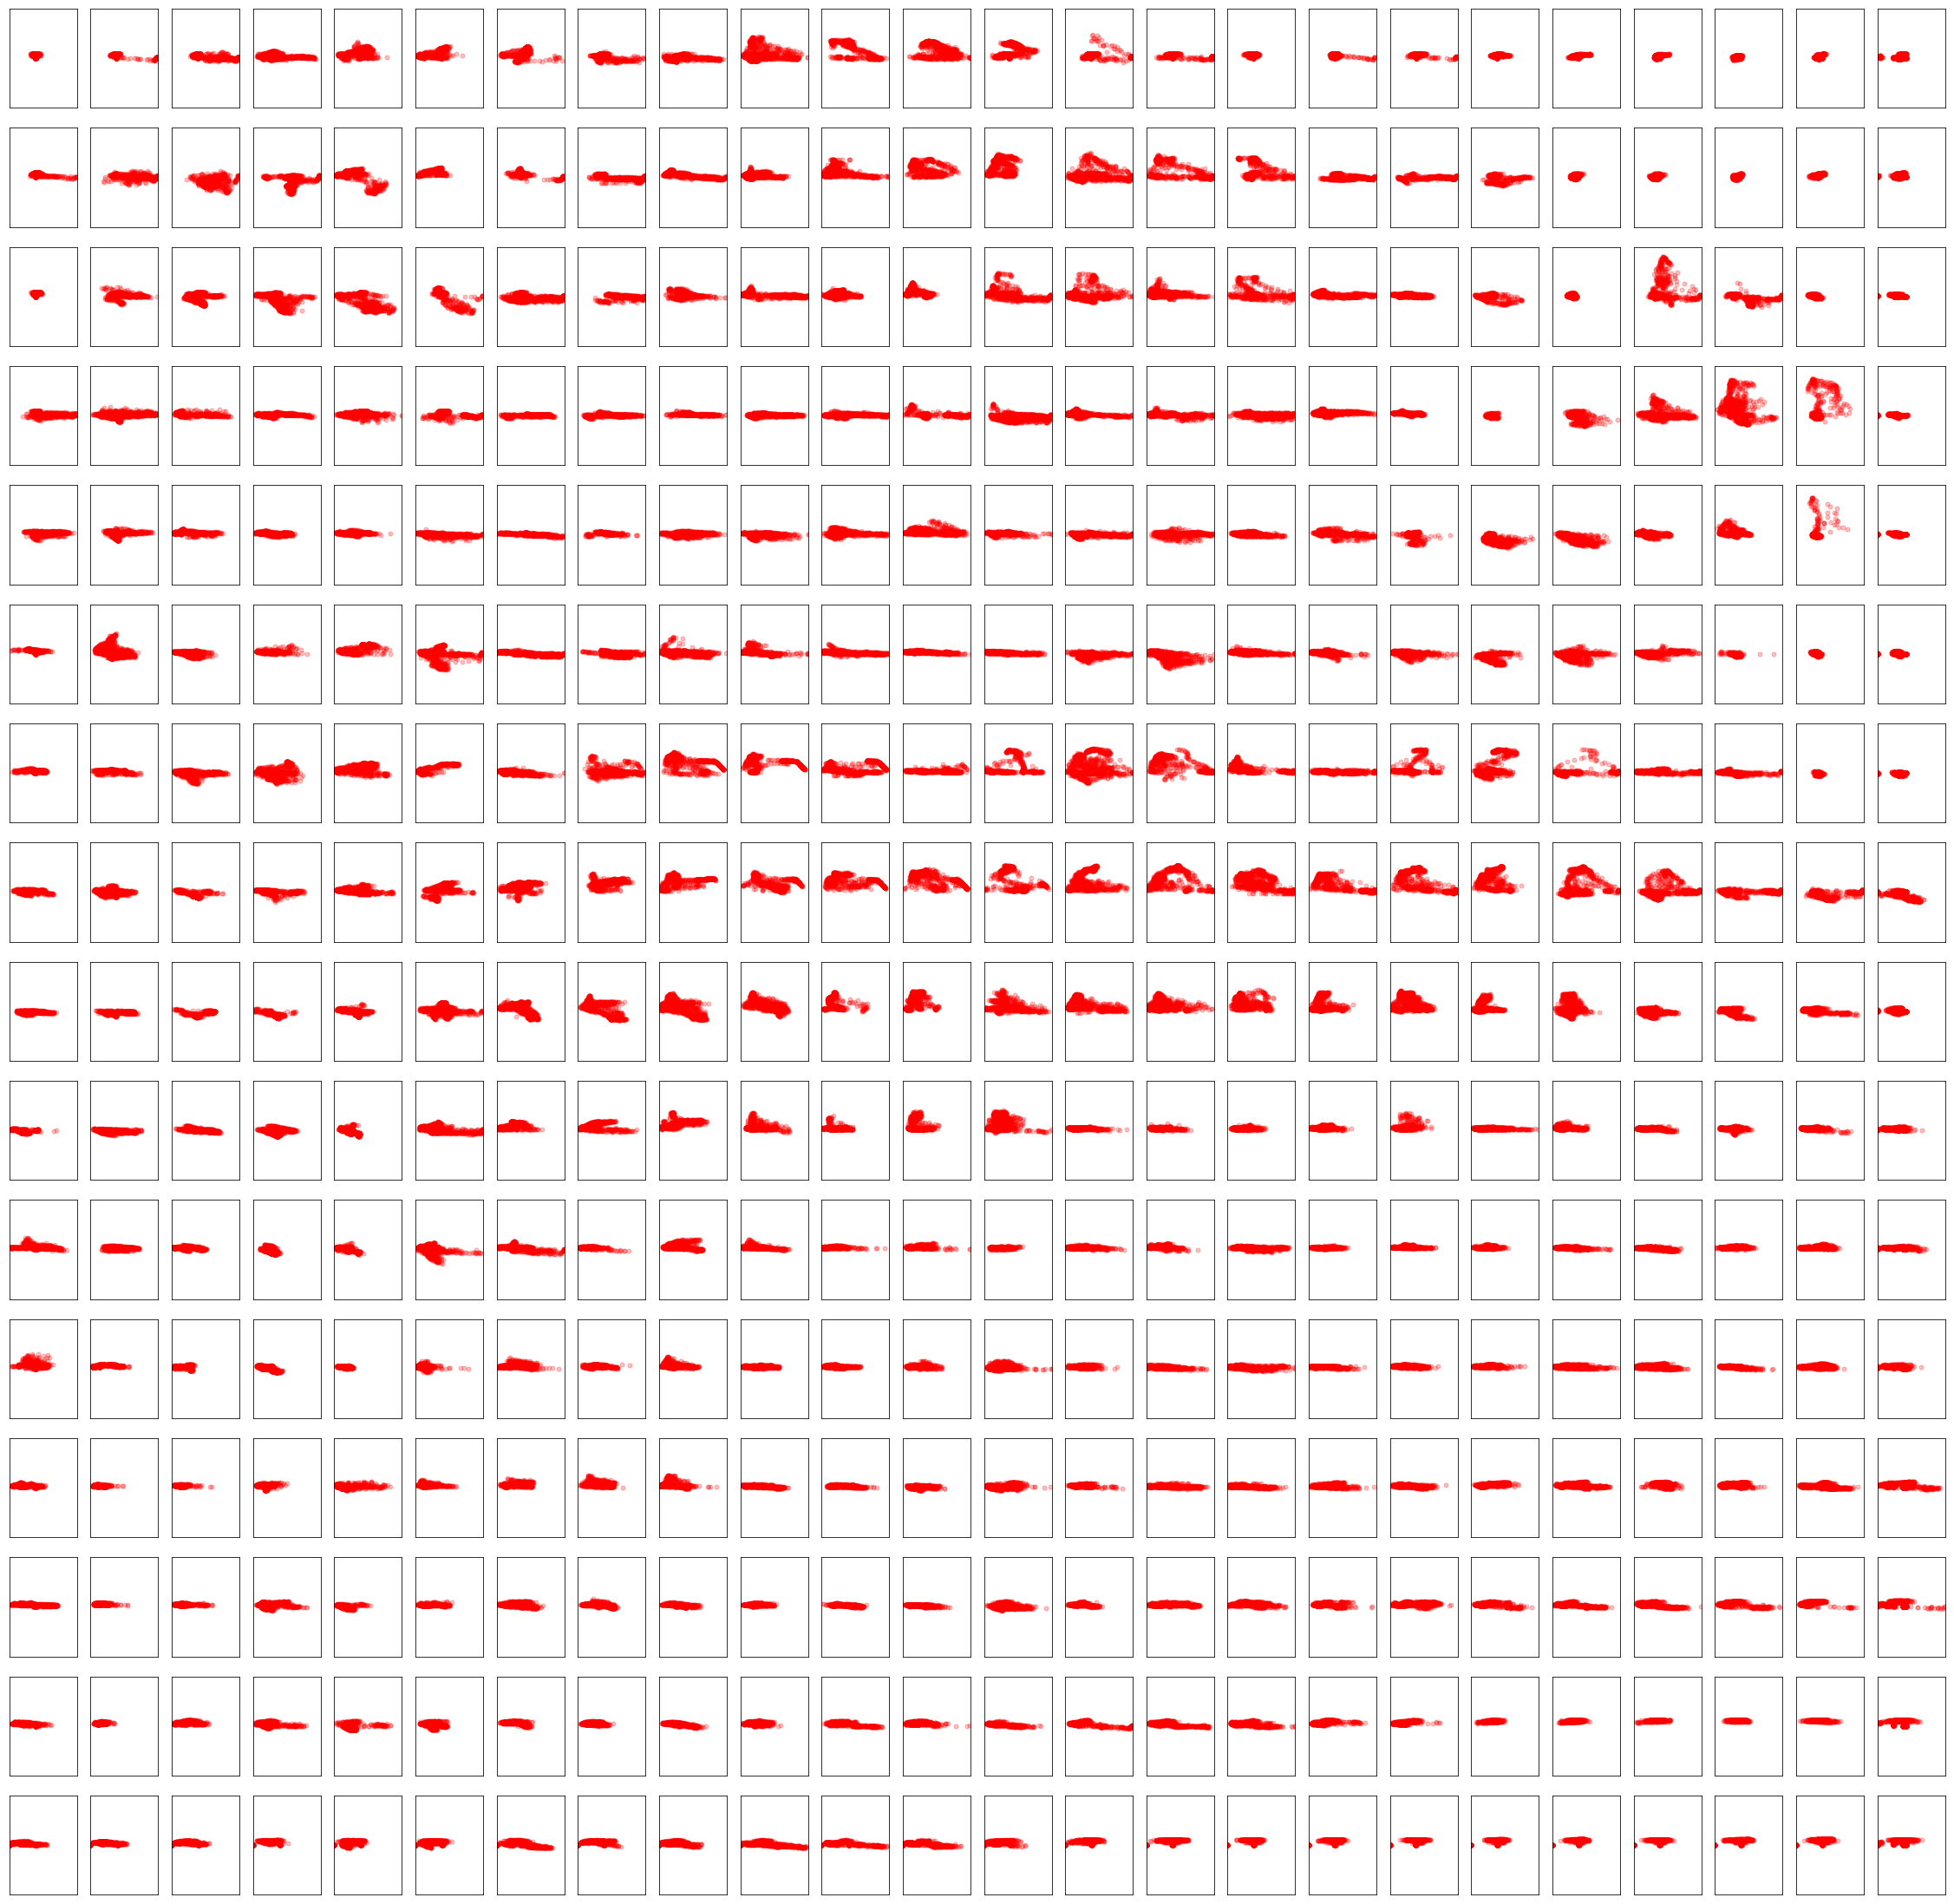

In [4]:
corrV = np.zeros((plot_height, plot_width))

plt.figure(figsize=(40,40))
yy = 0
zz = 1
for y in range(0, height, block_size):
    xx = 0
    for x in range(0, width, block_size):
        bY = im[y:y+block_size,x:x+block_size,0].ravel()
        bV = im[y:y+block_size,x:x+block_size,2].ravel()
        
        corr = np.corrcoef(bY, bV)
        corrV[yy,xx] = abs(corr[0,1])
        plt.subplot(plot_height,plot_width, zz)
        plt.scatter(bY, bV, c="red", alpha=0.25, s=25)
        plt.gca().set_ylim([0, 255])
        plt.gca().set_xlim([0, 255])
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
        xx = xx + 1
        zz = zz + 1
    yy = yy + 1

## Correlation Histogram

The following histogram presents the absolute correlation coefficients for both chroma planes. From this histogram we can conclude that for some block luma and chroma are strongly correlated, while for others there's no correlation.

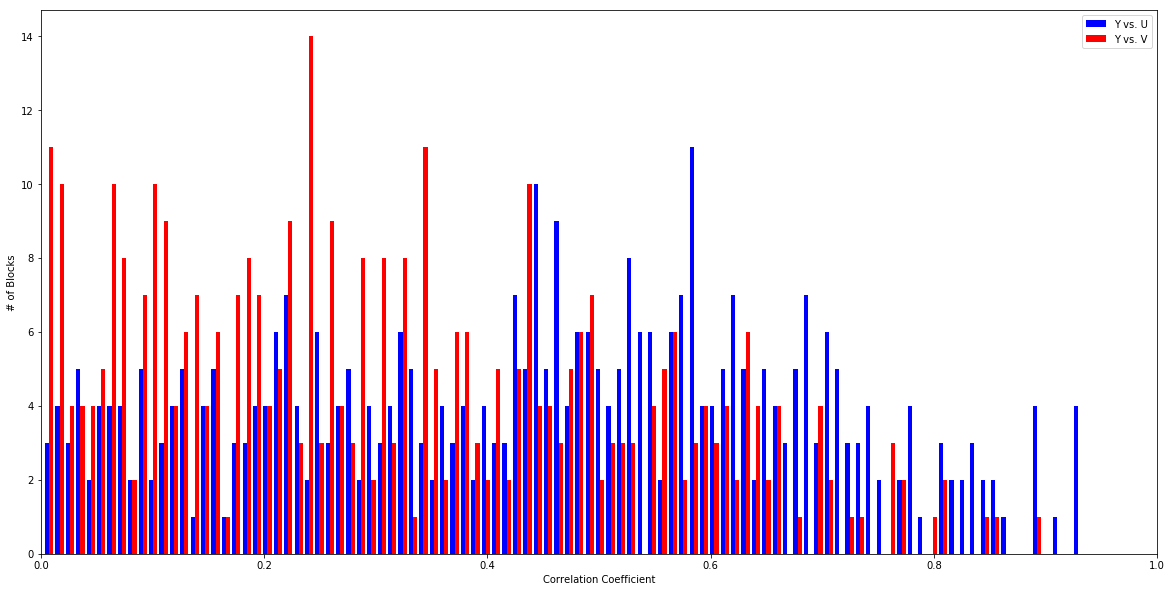

In [5]:
plt.figure(figsize=(20,10))
plt.hist((corrU.ravel(), corrV.ravel()), 100, color=['blue', 'red'])
plt.gca().set_xlim([0, 1]);
plt.xlabel("Correlation Coefficient")
plt.ylabel("# of Blocks");
plt.legend(['Y vs. U', 'Y vs. V']);

## Correlation Boxplot

The following boxplot shows the minimum, first quartile, median, third quartile and the maximum absolute correlation coefficient.

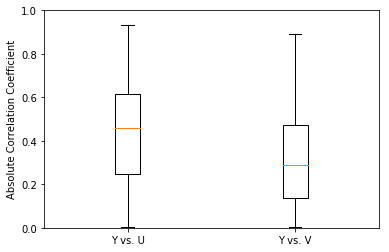

In [6]:
plt.boxplot((corrU.ravel(), corrV.ravel()), labels=['Y vs. U','Y vs. V']);
plt.gca().set_ylim([0, 1]);
plt.ylabel("Absolute Correlation Coefficient");